# Car Model Prediction with Multi-Layer Perceptron


## Srujan Esanakarra

#### October 19, 2021

# Dependencies

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Multi-Layer Perceptron

## Implementation of Network
### Forward propagation and backpropagation using stochastic gradient descent

In [156]:
class MLP:

  def __init__(self, X_train, y_train, lr=0.1, n_iter=100, num_input=2, 
               num_hidden=2, num_output=1, loss_function='Softplus'):
    """
    Initializing the multi-layer perceptron
    X_train: input data matrix
    y_train: expected outputs
    lr: the learning rate; default is 0.1
    n_iter: the number of times the training data is iterated through the model
    num_input: the number of features in the input layer
    num_hidden: the number of units in the hidden layer
    num_output: the number of units in the output layer
    """
    self.X_train = X_train
    self.y_train = y_train
    self.learning_rate = lr
    self.epochs = n_iter
    self.num_input = num_input
    self.num_hidden = num_hidden
    self.num_output = num_output
    self.loss_function = loss_function
    self.w = []
    self.b = []
    self.losses = []
    self.loss_by_epoch = []

    # Input layer to hidden layer weights; He et al. initialization
    self.w.append(np.random.normal(
        scale=np.sqrt(2/(self.num_input + self.num_hidden)),
                                                  size = (self.num_input, 
                                                          self.num_hidden)))

    # Hidden layer to output layer weights; He et al. initialization
    self.w.append(np.random.normal(
        scale=np.sqrt(2/(self.num_hidden + self.num_output)), 
                                    size = (self.num_hidden, self.num_output)))
    
    # Hidden layer biases
    self.b.append(np.zeros(self.num_hidden))

    # Output layer biases
    self.b.append(np.zeros(self.num_output))


  def ReLU(self, r):
    """
    ReLU
    r: input
    returns output of ReLU
    """
    f = np.maximum(0, r)
    return f


  def ReLU_deriv(self, r):
    """
    ReLU_deriv
    r: input
    returns output of derivative of ReLU
    """
    f = np.where(r >= 0, 1, 0)
    return f
  
  
  def sigmoid(self, r):
    """
    sigmoid
    r: input
    returns output of sigmoid
    """
    f = 1/(1 + np.exp(-r))
    return f


  def sigmoid_deriv(self, r):
    """
    sigmoid
    r: input
    returns output of derivative of sigmoid
    """
    f = np.multiply(r, (1 - r))
    return f
  
  
  def Softplus(self, r):
    """
    Softplus
    r: input
    returns output of Softplus; derivative is just sigmoid
    """
    f = np.log(1 + np.exp(r))
    return f
  

  def mse(self, r):
    """
    Mean Square Error Loss
    r: input
    returns output of Mean Square Error
    """
    f = 0.5 * np.square(r)
    return f

  
  def input_layer_forward_propagation(self, data):
    """
    input_layer_forward_propagation
    data: input data
    returns hidden layer values
    """
    return np.dot(data, self.w[0]) + self.b[0]

  
  def input_layer_back_propagation(self, data, gradient):
    """
    input_layer_back_propagation
    data: input data
    gradient: gradient of u2
    updates weights and biases for input layer to hidden layer
    """
    dW = np.dot(data.T, gradient)
    dc = np.mean(np.array(gradient), axis=0, keepdims=False)

    self.w[0] = self.w[0] - self.learning_rate * dW
    self.b[0] = self.b[0] - self.learning_rate * dc


  def hidden_layer_forward_propagation(self, data):
    """
    hidden_layer_forward_propagation
    data: activated hidden layer values
    returns output layer values
    """
    return np.dot(data, self.w[1]) + self.b[1]
  
  
  def hidden_layer_back_propagation(self, hidden_vals, gradient):
    """
    hidden_layer_back_propagation
    hidden_vals: hidden layer values
    gradient: gradient of u3
    updates weights and biases for hidden layer to output layer
    returns the gradient of h to be propagated to input layer
    """
    db = np.mean(np.array(gradient), axis=0, keepdims=False)
    dw = np.dot(hidden_vals.T, gradient)
    dh = np.dot(gradient, self.w[1].T)

    self.w[1] = self.w[1] - self.learning_rate * dw
    self.b[1] = self.b[1] - self.learning_rate * db

    return dh


  def forward_propagation(self, data):
    """
    forward_propagation
    single forward pass through the network using given batch of data
    """
    self.input = data
    self.hidden_layer_vals = self.input_layer_forward_propagation(self.input)
    self.hidden_layer_vals_act = self.ReLU(self.hidden_layer_vals)
    z = self.hidden_layer_forward_propagation(self.hidden_layer_vals_act)

    return z

  
  def back_propagation(self, gradient):
    """
    back_propagation
    computes errors and updates network parameters after forward_propagation
    """
    dh = self.hidden_layer_back_propagation(self.hidden_layer_vals_act, gradient)
    d2 = np.multiply(dh, self.ReLU_deriv(self.hidden_layer_vals))
    self.input_layer_back_propagation(self.input, d2)
  

  def shuffle(self, X, y):
    """
    shuffle
    X: values to be shuffled
    y: labels to be shuffled
    generates a random order to shuffle the data
    returns shuffled data
    """
    order = np.random.permutation(len(X))
    return X[order], y[order]


  def fit(self, batch_size=20):
    """
    fit
    batch_size: number of data points for each mini-batch to use in stochastic
    gradient descent
    trains the network for the specified number of epochs using SGD and specified
    batch_size and calcuates losses
    """
    batch_size = batch_size

    # Printing network parameters for confirmation
    print("Network Training \n")
    print("Number of Hidden Layers: 1")
    print("Layer 1")
    print("Number of Hidden Units: ", self.num_hidden)
    print("Activation Function: ReLU")
    print("Output Layer")
    print("Number of Outputs: ", self.num_output)
    print("Batch size: ", batch_size)
    print("Loss Function: " + str(self.loss_function))

    print("\nFitting data... \n")
    # training the network for the given number of epochs
    for e in range(self.epochs):
      # progress check for training
      if e % (self.epochs/20) == 0:
        print("Starting Epoch " + str(e+1) + "...")
      
      # shuffled data
      X_s, y_s = self.shuffle(self.X_train, self.y_train)
      # storing losses
      losses_for_epoch = []
      loss_for_epoch = None
      train_size = len(X_s)

      # performing stochastic gradient descent in mini-batches      
      for start in range(0, train_size, batch_size):
        stop = start + batch_size
        X_batch = X_s[start:stop] 
        y_batch = y_s[start:stop]
        
        # output layer values
        output = self.forward_propagation(X_batch)

        # calculate loss using loss function
        if self.loss_function == 'Softplus':
          adj = np.multiply(1 - (2 * y_batch), output)
          loss = self.Softplus(adj)
          dloss = self.sigmoid(adj)
          gradient = np.multiply(dloss, 1 - (2 * y_batch))
        else:
          adj = y_batch - output
          loss = self.mse(adj)
          gradient = -adj

        losses_for_epoch.append(loss)
        loss_for_epoch = loss.mean()
        self.loss_by_epoch.append(loss_for_epoch)
        # update network weights and biases
        self.back_propagation(gradient)

      self.losses.append(losses_for_epoch)
      
      # periodic network tracking
      if e % (self.epochs/20) == self.epochs/20 - 1:
        print("Finished Epochs " + str(int(e+1 - (self.epochs/20 - 1))) + 
              "-" + str(int(e+1)) + ".")
        print("Loss for Epoch " + str(int(e+1)) + ": " + str(loss_for_epoch))
    
    # self.losses = np.array(self.losses)

    print('Training Complete \n')


  def predict(self, X_test):
    """
    predict
    X_test: test data for predictions
    returns predicted classifications for test data
    """
    self.X_test = X_test
    
    output = self.forward_propagation(X_test)
    
    self.predictions = [1 if z>0 else 0 for z in output]
    
    return np.array(self.predictions)
  

  def classify(self, point):
    """
    classify
    point: single data point for prediction
    returns output for single data point
    """
    output = self.forward_propagation(point)
    if output > 0:
      return 1
    return 0


  def plot(self, data='test', h=0.01):
    """
    plot
    h: density for sampling
    generates plot of input or test data and decision boundary
    """
    # setting plot properties like size, theme and axis limits
    sns.set_style('darkgrid')
    plt.figure(figsize=(10, 10))

    plt.axis('scaled')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    colors = {
        0: "ro",
        1: "go"
    }

    if data == 'train':
      # plotting the train datapoints
      for i in range(len(self.X_train)):
        plt.plot([self.X_train[i][0,0]], [self.X_train[i][0,1]], 
                colors[self.y_train[i][0,0]], markersize=2)
    else:
      # plotting the test datapoints
      for i in range(len(self.X_test)):
        plt.plot([self.X_test[i][0,0]], [self.X_test[i][0,1]], 
                colors[np.array(self.predictions)[i]], markersize=2)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Regions')
    
    plt.gca().legend(('0', '1'))
    
    x_range = np.arange(-0.45, 1.55, h)
    y_range = np.arange(-0.45, 1.55, h)

    # creating a mesh to plot decision boundary
    xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
    Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])
    
    plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)


  def get_losses(self):
    """
    get_losses
    returns losses for all batches in all epochs
    """
    return self.losses
  
  
  def get_losses_at_end_of_epochs(self):
    """
    get_losses_at_end_of_epochs
    returns losses for final bactch in each epoch
    """
    self.loss_at_end_of_epochs = []
    
    for i in range(0, self.epochs):
        self.loss_at_end_of_epochs.append(self.losses[i][-1])
    
    return np.array(self.loss_at_end_of_epochs)
  

  def get_loss_by_epoch(self):
    """
    get_loss_by_epoch
    returns the loss for each epoch
    """
    return self.loss_by_epoch


  def get_avg_loss_by_epoch(self):
    """
    get_avg_loss_by_epoch
    return average loss for each epoch
    """
    self.avg_loss_by_epoch = []
    
    for i in range(0, self.epochs):
      self.avg_loss = 0
      
      for j in range(len(self.losses[i])):
        self.avg_loss += self.losses[i][j]
          
      self.avg_loss = self.avg_loss/len(self.losses[i])
      
      self.avg_loss_by_epoch.append(self.avg_loss)
    
    return np.array(self.avg_loss_by_epoch)

# MLP with XOR Data

## Data

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Curated noisy XOR data

In [2]:
data = pd.DataFrame(np.zeros((5000, 3)), columns=['x1', 'x2', 'y'])

# Make up some noisy XOR data to use to build binary classifier
for i in range(len(data.index)):
    x1 = 1.0 * random.randint(0,1)
    x2 = 1.0 * random.randint(0,1)
    y = 1.0 * np.logical_xor(x1==1,x2==1)
    x1 = x1 + 0.15 * np.random.normal()
    x2 = x2 + 0.15 * np.random.normal()
    data.iloc[i,0] = x1
    data.iloc[i,1] = x2
    data.iloc[i,2] = y
        
data.head()

,x1,x2,y
0,0.754181,-0.035152,1.0
1,-0.167445,1.160273,1.0
2,1.292299,1.143603,0.0
3,0.861811,0.995109,0.0
4,1.368274,0.136018,1.0


In [180]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them
X = np.matrix(X.values)
y = np.matrix(y.values)

Function to plot binary data

In [4]:
# Function for plotting our data
def plot_data(X, y_prob):
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    y_predict = y_prob > 0.5
    indices_0 = [k for k in range(0, X.shape[0]) if not y_predict[k]]
    indices_1 = [k for k in range(0, X.shape[0]) if y_predict[k]]

    ax.plot(X[indices_0, 0], X[indices_0,1], marker='o', linestyle='', ms=5, label='0')
    ax.plot(X[indices_1, 0], X[indices_1,1], marker='o', linestyle='', ms=5, label='1')

    ax.legend()
    ax.legend(loc=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Noisy XOR')
    plt.show()

Plot of noisy XOR data

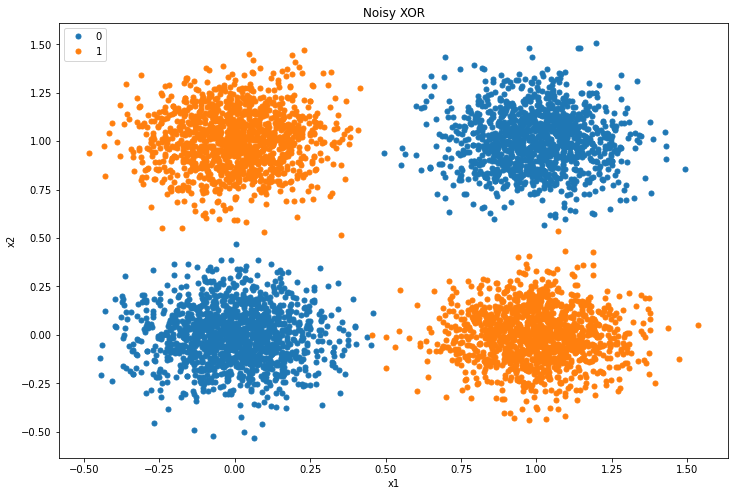

In [5]:
plot_data(X, y)

## Split Data

In [7]:
from itertools import chain

In [8]:
def _index(arr, indices):
    """
    function to return sub-arry from array and indices
    :param arr: array from which indices have to be obtained
    :param indices: indices to be obtained
    :return: sub-array from given array and indices
    """
    
    if hasattr(arr, 'shape'):
        return arr[indices]
    
    return [arr[idx] for idx in indices]

In [9]:
def train_test_split(*arrays, test_size=0.2, shuffle=True, random_seed=1):
    """
    function to split inputted arrays into training and test sets
    :param arrays: arrays to split into training and test sets
    :param test_size: size of test set in range (0,1)
    :param shuffle: shuffle arrays, yes or no
    :param random_seed: random seed value
    :return: return 2*len(arrays) divided into training and test sets
    """
    
    assert 0 < test_size < 1
    assert len(arrays) > 0
    length = len(arrays[0])
    for i in arrays:
        assert len(i) == length

    test_count = int(np.ceil(length*test_size))
    train_count = length - test_count

    if shuffle:
        perm = np.random.RandomState(random_seed).permutation(length)
        train_indices = perm[test_count:]
        test_indices = perm[:test_count]
    else:
        train_indices = np.arange(train_count)
        test_indices = np.arange(train_count, length)

    return list(chain.from_iterable((_index(arr, train_indices), 
                                     _index(arr, test_indices)) for arr in arrays))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, random_seed=24)

## Train and Test Network

### Attempt 1: Hidden Layer with 1 Hidden Unit

#### Train Network

In [34]:
num_epochs = 1000

network1 = MLP(X_train, y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=1, num_output=1, loss_function='Softplus')

network1.fit(batch_size=32)

predictions1 = network1.predict(X_test)
predictions1 = np.array(predictions1)
print("Predictions Complete \n")

accuracy1 = np.sum(predictions1 == np.squeeze(y_test)) / len(y_test)
print("Accuracy: " + str(accuracy1*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  1
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.654559335545194
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.49893977662758404
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.4519471026306442
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.3751066351628988
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.4561311191930865
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.48322452461076043
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.4092586650977189
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.46041380772877616
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.3749493392885773
Starting Epoch 451...
Finished 

#### Plot Decision Regions

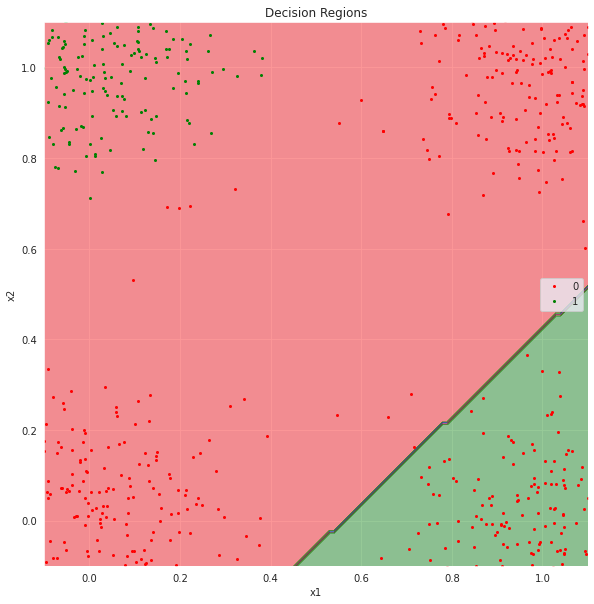

In [35]:
network1.plot(data='test')

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

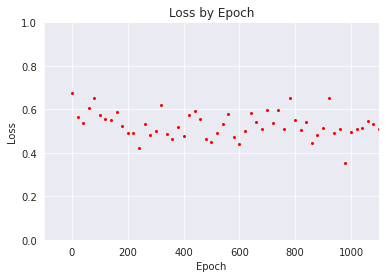

In [151]:
loss_by_epoch1 = network1.get_loss_by_epoch()
plot_losses1 = []

plot_losses1.append((1, loss_by_epoch1[0]))

for l in range(len(loss_by_epoch1)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses1.append((l+1, loss_by_epoch1[l]))
    

plot_losses1 = np.array(plot_losses1)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses1)):
  plt.plot([plot_losses1[i][0]], [plot_losses1[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Attempt 2: Hidden Layer with 2 Hidden Units

#### Train Network

In [38]:
num_epochs = 1000

network2 = MLP(X_train, y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=2, num_output=1, loss_function='Softplus')

network2.fit(batch_size=32)

predictions2 = network2.predict(X_test)
predictions2 = np.array(predictions2)
print("Predictions Complete \n")

accuracy2 = np.sum(predictions2 == np.squeeze(y_test)) / len(y_test)
print("Accuracy: " + str(accuracy2*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  2
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.16218934537773524
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.025223572538009713
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.015186219986400993
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.008737657056097789
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.021229922469618655
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.03511212458663765
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.14328472695688205
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.002817972089688598
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.04362942705857703
Starting Epoch 451.

#### Plot Decision Regions

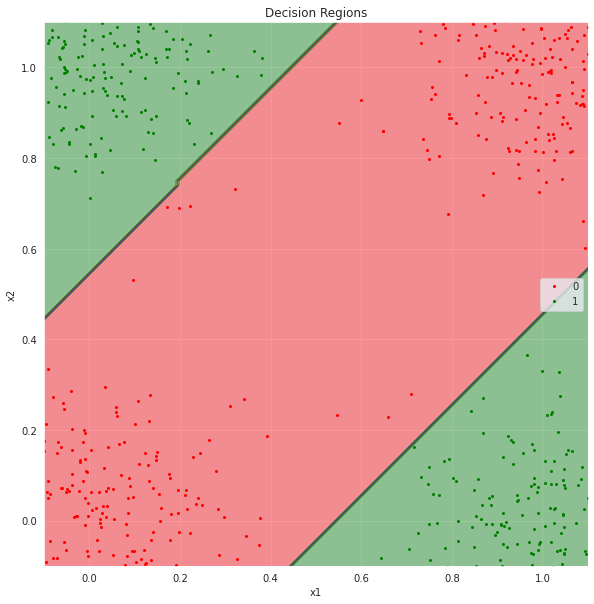

In [39]:
network2.plot(data='test')

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

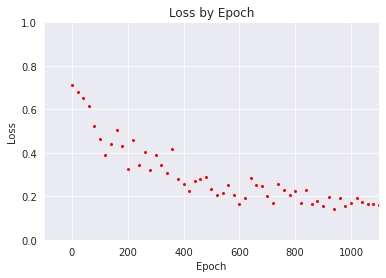

In [152]:
loss_by_epoch2 = network2.get_loss_by_epoch()
plot_losses2 = []

plot_losses2.append((1, loss_by_epoch2[0]))

for l in range(len(loss_by_epoch2)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses2.append((l+1, loss_by_epoch2[l]))
    

plot_losses2 = np.array(plot_losses2)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses2)):
  plt.plot([plot_losses2[i][0]], [plot_losses2[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Attempt 3: Hidden Layer with 3 Hidden Units

#### Train Network

In [26]:
num_epochs = 1000

network3 = MLP(X_train, y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=3, num_output=1, loss_function='Softplus')

network3.fit(batch_size=32)

predictions3 = network3.predict(X_test)
predictions3 = np.array(predictions3)
print("Predictions Complete \n")

accuracy3 = np.sum(predictions3 == np.squeeze(y_test)) / len(y_test)
print("Accuracy: " + str(accuracy3*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  3
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.020351207065554267
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.06146900134411331
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.0032445310045116755
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.06148358884155088
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.06567198774839329
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.002650329667949379
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.060663777870775606
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.022769404619971404
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.01908275641329549
Starting Epoch 451

#### Plot Decision Regions

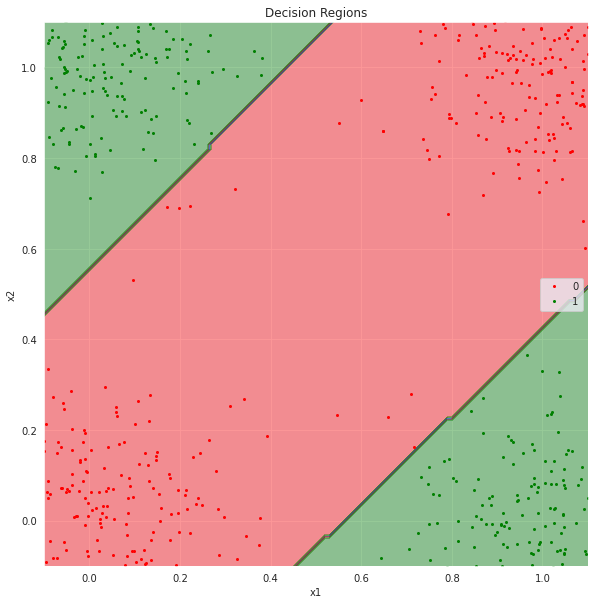

In [27]:
network3.plot(data='test')

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

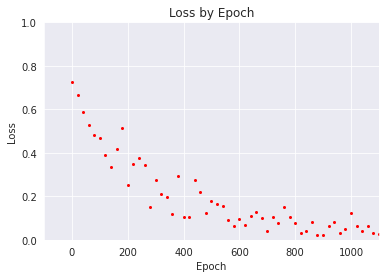

In [153]:
loss_by_epoch3 = network3.get_loss_by_epoch()
plot_losses3 = []

plot_losses3.append((1, loss_by_epoch3[0]))

for l in range(len(loss_by_epoch3)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses3.append((l+1, loss_by_epoch3[l]))
    

plot_losses3 = np.array(plot_losses3)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses3)):
  plt.plot([plot_losses3[i][0]], [plot_losses3[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Attempt 4: Hidden Layer with 16 Hidden Units

#### Train Network

In [20]:
num_epochs = 1000

network4 = MLP(X_train, y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=16, num_output=1, loss_function='Softplus')

network4.fit(batch_size=32)

predictions4 = network4.predict(X_test)
predictions4 = np.array(predictions4)
print("Predictions Complete \n")

accuracy4 = np.sum(predictions4 == np.squeeze(y_test)) / len(y_test)
print("Accuracy: " + str(accuracy4*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  16
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.0011708502922597893
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.001312961604143277
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 4.073468621164203e-05
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 1.3608761560437656e-05
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.000986490160163329
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.0016637710795888495
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 4.263667482633945e-05
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 6.209123805155084e-05
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.0010043915060626157
Starti

#### Plot Decision Regions

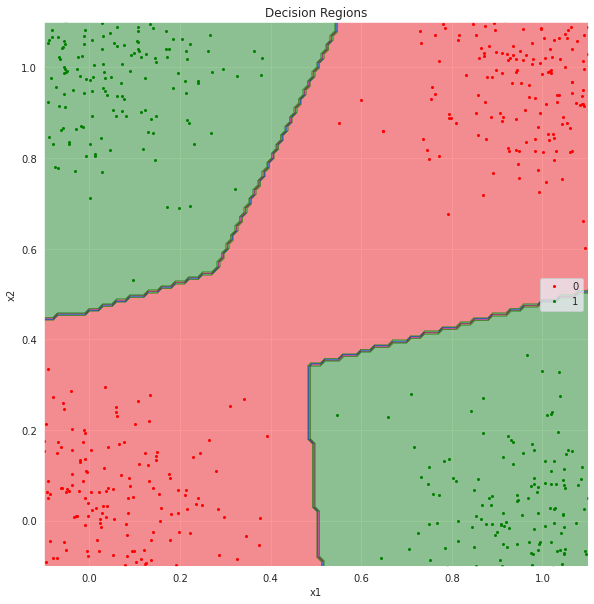

In [21]:
network4.plot(data='test')

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

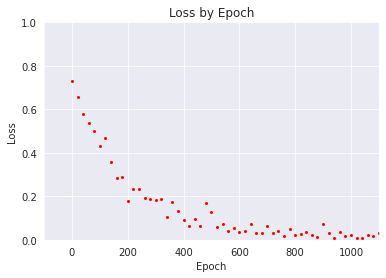

In [154]:
loss_by_epoch4 = network4.get_loss_by_epoch()
plot_losses4 = []

plot_losses4.append((1, loss_by_epoch4[0]))

for l in range(len(loss_by_epoch4)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses4.append((l+1, loss_by_epoch4[l]))
    

plot_losses4 = np.array(plot_losses4)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses4)):
  plt.plot([plot_losses4[i][0]], [plot_losses4[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Attempt 5: Hidden Layer with 512 Hidden Units

#### Train Network

In [23]:
num_epochs = 1000

network5 = MLP(X_train, y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=512, num_output=1, loss_function='Softplus')

network5.fit(batch_size=32)

predictions5 = network5.predict(X_test)
predictions5 = np.array(predictions5)
print("Predictions Complete \n")

accuracy5 = np.sum(predictions5 == np.squeeze(y_test)) / len(y_test)
print("Accuracy: " + str(accuracy5*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  512
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.0008835064451001692
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.00032987277421195224
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.0007574477185321409
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 5.405831786040422e-05
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.005523293378772507
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 4.4374420979134554e-05
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.0011310755303109443
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.003919990986420307
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.00010221166597733718
Sta

#### Plot Decision Regions

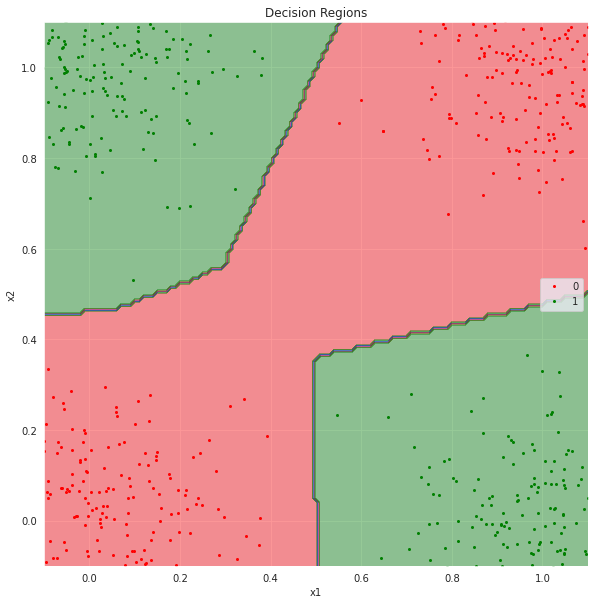

In [24]:
network5.plot(data='test')

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

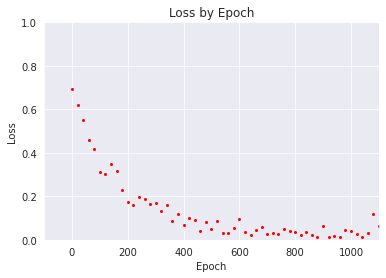

In [155]:
loss_by_epoch5 = network5.get_loss_by_epoch()
plot_losses5 = []

plot_losses5.append((1, loss_by_epoch5[0]))

for l in range(len(loss_by_epoch5)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses5.append((l+1, loss_by_epoch5[l]))
    

plot_losses5 = np.array(plot_losses5)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses5)):
  plt.plot([plot_losses5[i][0]], [plot_losses5[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Discussion: How the number of hidden units affects the solution

As the number of hidden units increases, the network converges towards a better approximation of the XOR solution. With just one hidden unit, the network is not able to adequately learn the XOR function and discern the features. As the number of hidden units increases, it is able to learn the function better and discern the distinct features, as in the case of two and three hidden units. The accuracy of the network increases on the test data with more hidden units and the loss function decreases more rapidly, as the network is able to more quickly converge on the solution with more hidden units. However, with too many hidden units, the network overfits the data and lacks generalizability, as with 16 and 512 units. Thus, there is an optimal number of hidden units for each network that adequately learns the desired function and is generalizable.

## Train and Test Network with Mean Square Error Loss

### Attempt 1: Hidden Layer with 1 Hidden Unit

#### Train Network

In [157]:
num_epochs = 1000

network1b = MLP(X_train, y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=1, num_output=1, loss_function='MSE')

network1b.fit(batch_size=32)

predictions1b = network1b.predict(X_test)
predictions1b = np.array(predictions1b)
print("Predictions Complete \n")

accuracy1b = np.sum(predictions1b == np.squeeze(y_test)) / len(y_test)
print("Accuracy: " + str(accuracy1b*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  1
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: MSE

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.10896136426920798
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.09925180432791106
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.08964216479608302
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.07822627062511103
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.09963901532706733
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.08909137827176426
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.10271489134095754
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.09674935318931138
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.09043838026442055
Starting Epoch 451...
Finishe

#### Plot Decision Regions

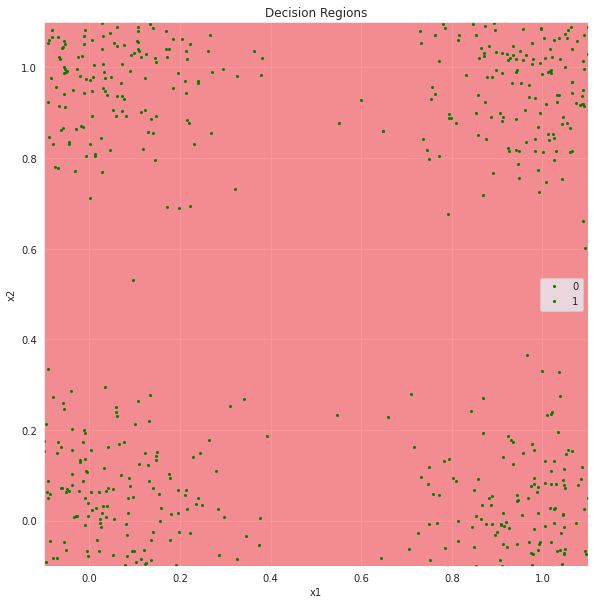

In [158]:
network1b.plot(data='test')

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

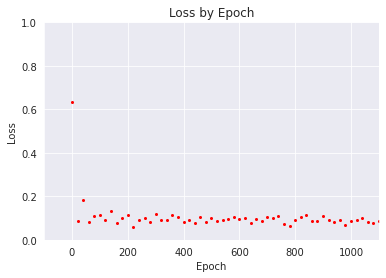

In [159]:
loss_by_epoch1b = network1b.get_loss_by_epoch()
plot_losses1b = []

plot_losses1b.append((1, loss_by_epoch1b[0]))

for l in range(len(loss_by_epoch1b)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses1b.append((l+1, loss_by_epoch1b[l]))
    

plot_losses1b = np.array(plot_losses1b)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses1b)):
  plt.plot([plot_losses1b[i][0]], [plot_losses1b[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Attempt 2: Hidden Layer with 2 Hidden Units

#### Train Network

In [160]:
num_epochs = 1000

network2b = MLP(X_train, y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=2, num_output=1, loss_function='MSE')

network2b.fit(batch_size=32)

predictions2b = network2b.predict(X_test)
predictions2b = np.array(predictions2b)
print("Predictions Complete \n")

accuracy2b = np.sum(predictions2b == np.squeeze(y_test)) / len(y_test)
print("Accuracy: " + str(accuracy2b*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  2
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: MSE

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.010571020188944956
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.009124231676913676
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.015945054983722336
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.015416203852020104
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.04306664533692811
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.019720238015619014
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.012541676479868796
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.012612398771706375
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.022718394395341377
Starting Epoch 451...

#### Plot Decision Regions

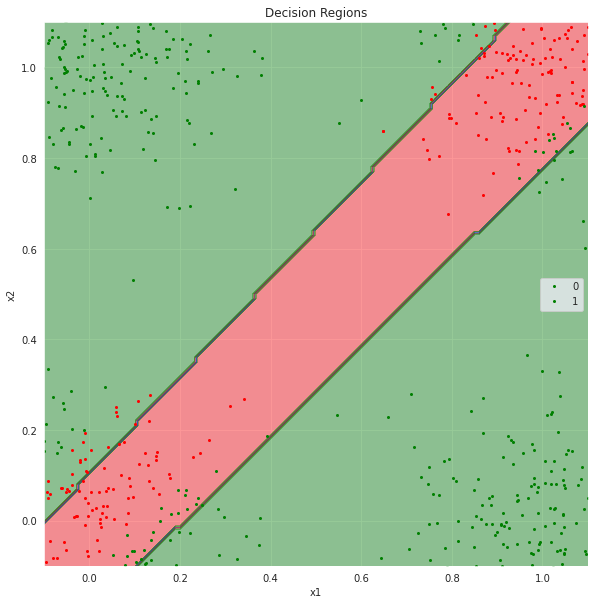

In [161]:
network2b.plot(data='test')

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

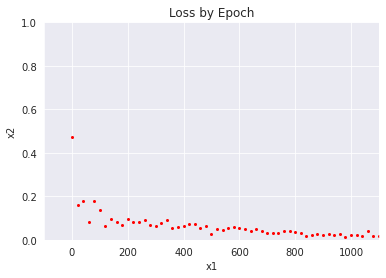

In [162]:
loss_by_epoch2b = network2b.get_loss_by_epoch()
plot_losses2b = []

plot_losses2b.append((1, loss_by_epoch2b[0]))

for l in range(len(loss_by_epoch2b)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses2b.append((l+1, loss_by_epoch2b[l]))
    

plot_losses2b = np.array(plot_losses2b)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses2b)):
  plt.plot([plot_losses2b[i][0]], [plot_losses2b[i][1]], colors[0], markersize=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Loss by Epoch')

### Attempt 3: Hidden Layer with 3 Hidden Units

#### Train Network

In [163]:
num_epochs = 1000

network3b = MLP(X_train, y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=3, num_output=1, loss_function='MSE')

network3b.fit(batch_size=32)

predictions3b = network3b.predict(X_test)
predictions3b = np.array(predictions3b)
print("Predictions Complete \n")

accuracy3b = np.sum(predictions3b == np.squeeze(y_test)) / len(y_test)
print("Accuracy: " + str(accuracy3b*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  3
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: MSE

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.0793772234000847
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.06100168901965713
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.05532242745002587
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.017281935955508976
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.014491497054852705
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.014919181735332894
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.01933814459953515
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.013256330669702582
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.010491703571393559
Starting Epoch 451...
Fin

#### Plot Decision Regions

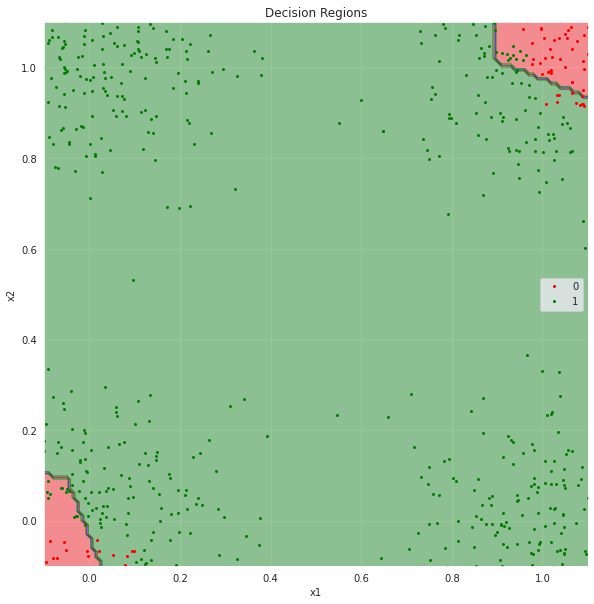

In [164]:
network3b.plot(data='test')

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

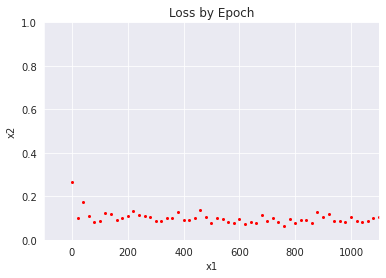

In [165]:
loss_by_epoch3b = network3b.get_loss_by_epoch()
plot_losses3b = []

plot_losses3b.append((1, loss_by_epoch3b[0]))

for l in range(len(loss_by_epoch3b)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses3b.append((l+1, loss_by_epoch3b[l]))
    

plot_losses3b = np.array(plot_losses3b)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses3b)):
  plt.plot([plot_losses3b[i][0]], [plot_losses3b[i][1]], colors[0], markersize=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Loss by Epoch')

### Attempt 4: Hidden Layer with 16 Hidden Units

#### Train Network

In [166]:
num_epochs = 1000

network4b = MLP(X_train, y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=16, num_output=1, loss_function='MSE')

network4b.fit(batch_size=32)

predictions4b = network4b.predict(X_test)
predictions4b = np.array(predictions4b)
print("Predictions Complete \n")

accuracy4b = np.sum(predictions4b == np.squeeze(y_test)) / len(y_test)
print("Accuracy: " + str(accuracy4b*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  16
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: MSE

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.0013996429049349627
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.0025881190577311075
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.00039548996372496025
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.0002667262966269054
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.0013694974584202617
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.004238205317324853
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.0015281177050996814
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.0005473904194576714
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.001733150308002374
Starting Ep

#### Plot Decision Regions

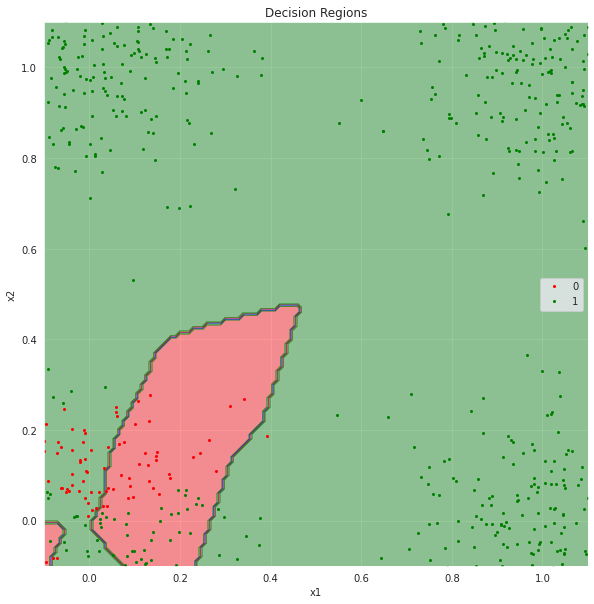

In [167]:
network4b.plot(data='test')

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

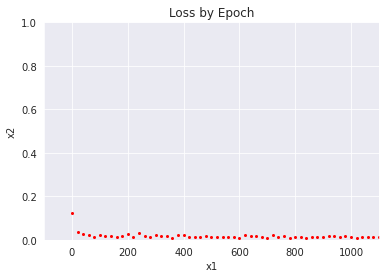

In [168]:
loss_by_epoch4b = network4b.get_loss_by_epoch()
plot_losses4b = []

plot_losses4b.append((1, loss_by_epoch4b[0]))

for l in range(len(loss_by_epoch4b)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses4b.append((l+1, loss_by_epoch4b[l]))
    

plot_losses4b = np.array(plot_losses4b)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses4b)):
  plt.plot([plot_losses4b[i][0]], [plot_losses4b[i][1]], colors[0], markersize=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Loss by Epoch')

### Attempt 5: Hidden Layer with 512 Hidden Units

#### Train Network

In [169]:
num_epochs = 1000

network5b = MLP(X_train, y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=512, num_output=1, loss_function='MSE')

network5b.fit(batch_size=32)

predictions5b = network5b.predict(X_test)
predictions5b = np.array(predictions5b)
print("Predictions Complete \n")

accuracy5b = np.sum(predictions5b == np.squeeze(y_test)) / len(y_test)
print("Accuracy: " + str(accuracy5b*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  512
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: MSE

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.0065152564416259455
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.004709631190354385
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.0015307281804955017
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.0064609705131697046
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.0018113072740169917
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.00028083485134545826
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.00029028626168105406
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.00016042762066105991
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.00020168292030084889
Starti

#### Plot Decision Regions

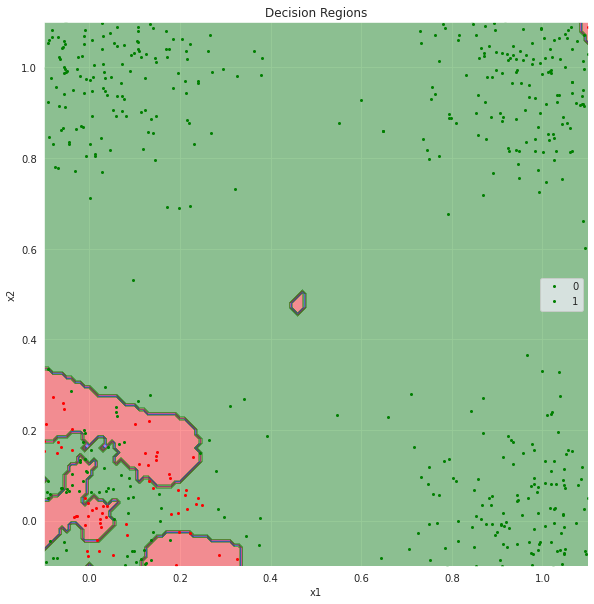

In [170]:
network5b.plot(data='test')

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

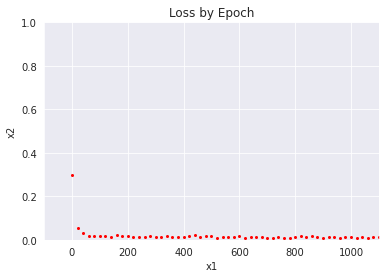

In [171]:
loss_by_epoch5b = network5b.get_loss_by_epoch()
plot_losses5b = []

plot_losses5b.append((1, loss_by_epoch5b[0]))

for l in range(len(loss_by_epoch5b)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses5b.append((l+1, loss_by_epoch5b[l]))
    

plot_losses5b = np.array(plot_losses5b)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses5b)):
  plt.plot([plot_losses5b[i][0]], [plot_losses5b[i][1]], colors[0], markersize=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Loss by Epoch')

### Discussion

I chose to evaluate the network with a Mean Square Error loss function. Compared to when using the Softplus loss, the network is less accurate and struggles to learn the desired function using MSE loss. The network performs best with MSE loss when using 2 hidden units, which is explained by the 2 units in the input layer and 1 unit in the output layer. It underfits and is unable to classify with 1 hidden unit, but begins to overfit the data with 3 units and fully overfits it with 16 and 512 units. While the loss decreases more rapidly with increasing number of hidden units, the highest accuracy is achieved with 2 hidden units, which is the best setting for the network to learn the function and generalize it when using MSE loss.

## 3 Inputs

### Data

In [175]:
data3d = pd.DataFrame(np.zeros((5000, 4)), columns=['x1', 'x2', 'x3', 'y'])

# Make up some noisy XOR data to use to build our binary classifier
for i in range(len(data3d.index)):
    x1 = 1.0 * random.randint(0,1)
    x2 = 1.0 * random.randint(0,1)
    x3 = 1.0 * random.randint(0,1)
    y = 1.0 * ((x1 + x2 + x3)==1)
    x1 = x1 + 0.15 * np.random.normal()
    x2 = x2 + 0.15 * np.random.normal()
    x3 = x3 + 0.15 * np.random.normal()
    data3d.iloc[i,0] = x1
    data3d.iloc[i,1] = x2
    data3d.iloc[i,2] = x3
    data3d.iloc[i,3] = y
        
data3d.head()

,x1,x2,x3,y
0,-0.246777,0.029640,1.089722,1.0
1,0.887756,1.073954,-0.288386,0.0
2,0.739514,1.012641,1.153135,0.0
3,-0.180778,0.869151,0.939720,0.0
4,0.103640,0.777440,0.977614,0.0


In [217]:
# set X (training data) and y (target variable)
cols3d = data3d.shape[1]
X3d = data3d.iloc[:,0:cols3d-1]
y3d = data3d.iloc[:,cols3d-1:cols3d]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them  
X3d = np.matrix(X3d.values)
y3d = np.matrix(y3d.values)

In [182]:
X3d_train, X3d_test, y3d_train, y3d_test = train_test_split(X3d, y3d, shuffle=False, random_seed=24)

### Attempt 1: Hidden Layer with 1 Hidden Unit

#### Train Network

In [186]:
num_epochs = 1000

network13d = MLP(X3d_train, y3d_train, lr=0.01, n_iter=num_epochs, num_input=3, 
              num_hidden=1, num_output=1, loss_function='Softplus')

network13d.fit(batch_size=32)

predictions13d = network13d.predict(X3d_test)
predictions13d = np.array(predictions13d)
print("Predictions Complete \n")

accuracy13d = np.sum(predictions13d == np.squeeze(y3d_test)) / len(y3d_test)
print("Accuracy: " + str(accuracy13d*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  1
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.5067889197375792
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.5450967115202667
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.6315618085277608
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.47154739441782945
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.531313496097131
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.5167463693770131
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.5902866343714922
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.4718710446528188
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.4567326737297587
Starting Epoch 451...
Finished Ep

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

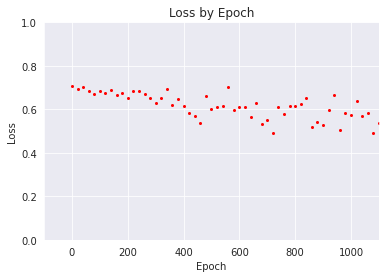

In [187]:
loss_by_epoch13d = network13d.get_loss_by_epoch()
plot_losses13d = []

plot_losses13d.append((1, loss_by_epoch13d[0]))

for l in range(len(loss_by_epoch13d)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses13d.append((l+1, loss_by_epoch13d[l]))
    

plot_losses13d = np.array(plot_losses13d)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses13d)):
  plt.plot([plot_losses13d[i][0]], [plot_losses13d[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Attempt 2: Hidden Layer with 2 Hidden Units

#### Train Network

In [188]:
num_epochs = 1000

network23d = MLP(X3d_train, y3d_train, lr=0.01, n_iter=num_epochs, num_input=3, 
              num_hidden=2, num_output=1, loss_function='Softplus')

network23d.fit(batch_size=32)

predictions23d = network23d.predict(X3d_test)
predictions23d = np.array(predictions23d)
print("Predictions Complete \n")

accuracy23d = np.sum(predictions23d == np.squeeze(y3d_test)) / len(y3d_test)
print("Accuracy: " + str(accuracy23d*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  2
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.20165606169205885
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.49283047085825493
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.26954312392012936
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.3389581232365895
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.22842226345628144
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.27966144117402914
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.29590102169292964
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.3259939830426485
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.28894896198669945
Starting Epoch 451...
Fini

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

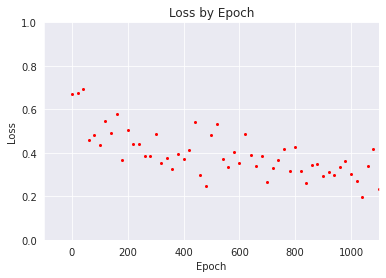

In [189]:
loss_by_epoch23d = network23d.get_loss_by_epoch()
plot_losses23d = []

plot_losses23d.append((1, loss_by_epoch23d[0]))

for l in range(len(loss_by_epoch23d)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses23d.append((l+1, loss_by_epoch23d[l]))
    

plot_losses23d = np.array(plot_losses23d)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses23d)):
  plt.plot([plot_losses23d[i][0]], [plot_losses23d[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Attempt 3: Hidden Layer with 3 Hidden Units

#### Train Network

In [190]:
num_epochs = 1000

network33d = MLP(X3d_train, y3d_train, lr=0.01, n_iter=num_epochs, num_input=3, 
              num_hidden=3, num_output=1, loss_function='Softplus')

network33d.fit(batch_size=32)

predictions33d = network33d.predict(X3d_test)
predictions33d = np.array(predictions33d)
print("Predictions Complete \n")

accuracy33d = np.sum(predictions33d == np.squeeze(y3d_test)) / len(y3d_test)
print("Accuracy: " + str(accuracy33d*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  3
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.3727988950363391
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.30913695666548757
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.37690850992429586
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.2759296207197323
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.1851802958389514
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.4453617396066599
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.33448100194128694
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.22965549217874912
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.3771760070489517
Starting Epoch 451...
Finishe

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

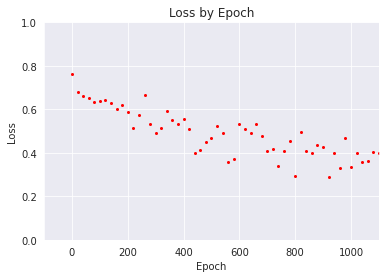

In [191]:
loss_by_epoch33d = network33d.get_loss_by_epoch()
plot_losses33d = []

plot_losses33d.append((1, loss_by_epoch33d[0]))

for l in range(len(loss_by_epoch33d)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses33d.append((l+1, loss_by_epoch33d[l]))
    

plot_losses33d = np.array(plot_losses33d)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses33d)):
  plt.plot([plot_losses33d[i][0]], [plot_losses33d[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Attempt 4: Hidden Layer with 16 Hidden Units

#### Train Network

In [192]:
num_epochs = 1000

network43d = MLP(X3d_train, y3d_train, lr=0.01, n_iter=num_epochs, num_input=3, 
              num_hidden=16, num_output=1, loss_function='Softplus')

network43d.fit(batch_size=32)

predictions43d = network43d.predict(X3d_test)
predictions43d = np.array(predictions43d)
print("Predictions Complete \n")

accuracy43d = np.sum(predictions43d == np.squeeze(y3d_test)) / len(y3d_test)
print("Accuracy: " + str(accuracy43d*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  16
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.05657007603994658
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.019229562271918774
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.0037567492999694167
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.00019458890914458594
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.002203141118550565
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.0010502248658272144
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.000281383029720496
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.00013847785461719973
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.00021656535429029155
Startin

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

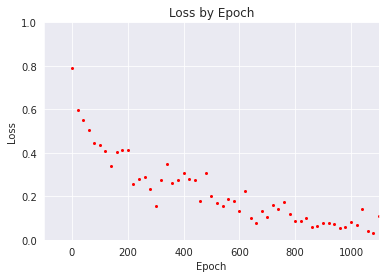

In [193]:
loss_by_epoch43d = network43d.get_loss_by_epoch()
plot_losses43d = []

plot_losses43d.append((1, loss_by_epoch43d[0]))

for l in range(len(loss_by_epoch43d)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses43d.append((l+1, loss_by_epoch43d[l]))
    

plot_losses43d = np.array(plot_losses43d)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses43d)):
  plt.plot([plot_losses43d[i][0]], [plot_losses43d[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Attempt 5: Hidden Layer with 512 Hidden Units

#### Train Network

In [194]:
num_epochs = 1000

network53d = MLP(X3d_train, y3d_train, lr=0.01, n_iter=num_epochs, num_input=3, 
              num_hidden=512, num_output=1, loss_function='Softplus')

network53d.fit(batch_size=32)

predictions53d = network53d.predict(X3d_test)
predictions53d = np.array(predictions53d)
print("Predictions Complete \n")

accuracy53d = np.sum(predictions53d == np.squeeze(y3d_test)) / len(y3d_test)
print("Accuracy: " + str(accuracy53d*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  512
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  32
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.007644880344845277
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.0033370707804444076
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.0010547577685932757
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 0.0007697590461046139
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.00022625692211856918
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.0007825953319058024
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 7.571444101693601e-05
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.00021850051546357964
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.000630070872640717
Star

#### Plot Loss by Epoch

Text(0.5, 1.0, 'Loss by Epoch')

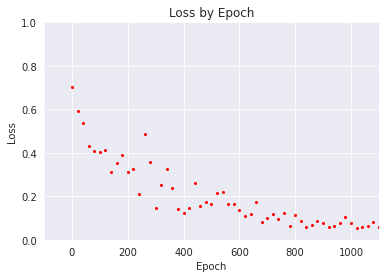

In [195]:
loss_by_epoch53d = network53d.get_loss_by_epoch()
plot_losses53d = []

plot_losses53d.append((1, loss_by_epoch53d[0]))

for l in range(len(loss_by_epoch53d)):
  if l % (num_epochs/50) == num_epochs/50 - 1:
    plot_losses53d.append((l+1, loss_by_epoch53d[l]))
    

plot_losses53d = np.array(plot_losses53d)

sns.set_style('darkgrid')

plt.xlim(-100,1100)
plt.ylim(0,1)

colors = {
    0: "ro",
    1: "go"
}

for i in range(len(plot_losses53d)):
  plt.plot([plot_losses53d[i][0]], [plot_losses53d[i][1]], colors[0], markersize=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')

### Discussion

With three inputs, the network needs more hidden units to learn the features and accurately classify the data. This can be seen as the accuracy with 3 units is not as high as it is with 16, whereas 3 units were sufficient for two inputs. The losses follow the same pattern as before, decreasing more rapidly with increasing number of hidden units. It is evident that the classification accuracy and effeectiveness of a network is related to the careful selection of the number of hidden units in the hidden layer with regard to the number of inputs.

## Train Network on Car Sales Data for Car Model Prediction

### Data

##### Google Drive URL for Data

https://drive.google.com/drive/folders/1yZecWYSobFP2Vc08zQPlDXr3lNsjf1gO?usp=sharing

##### Read Data

In [225]:
# remove percent sign from data
def percent_to_float(x):
    return float(x.strip('%'))

# read data into DataFrame
df = pd.read_csv(
    "Car Sales By Model.csv", 
                 converters={'Change':percent_to_float, 
                             'YTD Change':percent_to_float})
df.rename(columns={'Change':'Change (%)', 'YTD Change':'YTD Change (%)'}, 
          inplace=True)
df.style.set_caption("Vehicle Sales By Model in U.S. 2019")

df

,Model,2019 Dec,2018 Dec,Change (%),YTD 2019,YTD 2018,YTD Change (%),Price,MPG,Type of Gas,Type of Vehicle
0,Ford F-Series,77033,87772,-12.24,896526,909330,-1.41,39895.0,21,Diesel,Truck
1,Ram Pickup,56825,60155,-5.54,633694,536980,18.01,34795.0,23,Diesel,Truck
2,Chevrolet Silverado,53785,54424,-1.17,575569,585582,-1.71,29300.0,21,Diesel,Truck
3,Toyota RAV4,41282,38669,6.76,448068,427168,4.89,26350.0,30,Regular,SUV
4,Honda CR-V,36098,42079,-14.21,384168,379021,1.36,25750.0,30,Regular,SUV
...,...,...,...,...,...,...,...,...,...,...,...
267,Porsche Taycan,130,0,0.00,130,0,0.00,82700.0,79,Electricity,Car
268,Chrysler 200,1,6,-83.33,48,1043,-95.40,24000.0,27,Regular,Car
269,Cadillac CT5,43,0,0.00,43,0,0.00,36995.0,25,Premium,Car
270,Jeep Patriot,2,9,-77.78,27,621,-95.65,19000.0,26,Regular,SUV


#### Pre-processing

In [226]:
# combine vehicle labels to form two classes
df.loc[df['Type of Vehicle'] == "SUV", 'Type of Vehicle'] = "SUVTM"
df.loc[df['Type of Vehicle'] == "Truck", 'Type of Vehicle'] = "SUVTM"
df.loc[df['Type of Vehicle'] == "Minivan", 'Type of Vehicle'] = "SUVTM"
df.loc[df['Type of Vehicle'] == "Van", 'Type of Vehicle'] = "SUVTM"

df

,Model,2019 Dec,2018 Dec,Change (%),YTD 2019,YTD 2018,YTD Change (%),Price,MPG,Type of Gas,Type of Vehicle
0,Ford F-Series,77033,87772,-12.24,896526,909330,-1.41,39895.0,21,Diesel,SUVTM
1,Ram Pickup,56825,60155,-5.54,633694,536980,18.01,34795.0,23,Diesel,SUVTM
2,Chevrolet Silverado,53785,54424,-1.17,575569,585582,-1.71,29300.0,21,Diesel,SUVTM
3,Toyota RAV4,41282,38669,6.76,448068,427168,4.89,26350.0,30,Regular,SUVTM
4,Honda CR-V,36098,42079,-14.21,384168,379021,1.36,25750.0,30,Regular,SUVTM
...,...,...,...,...,...,...,...,...,...,...,...
267,Porsche Taycan,130,0,0.00,130,0,0.00,82700.0,79,Electricity,Car
268,Chrysler 200,1,6,-83.33,48,1043,-95.40,24000.0,27,Regular,Car
269,Cadillac CT5,43,0,0.00,43,0,0.00,36995.0,25,Premium,Car
270,Jeep Patriot,2,9,-77.78,27,621,-95.65,19000.0,26,Regular,SUVTM


#### Encode Labels and Scale Data

In [333]:
# encode vehicle labels with integers
df["Type of Vehicle"] = df["Type of Vehicle"].astype('category')
df["Label"] = df["Type of Vehicle"].cat.codes
# scaling data to avoid overflow issues
df["YTD 2019"] = df["YTD 2019"].div(1000000)
df["YTD Change (%)"] = df["YTD Change (%)"].div(100)

#### Feature Selection

In [334]:
# select features
df_f = df[["YTD Change (%)", "YTD 2019", "Label"]]

#### Convert Data into Matrices

In [335]:
# set X (training data) and y (target variable)
car_cols = df_f.shape[1]
car_X = df_f.iloc[:,0:car_cols-1]
car_y = df_f.iloc[:,car_cols-1:car_cols]

# convert data for classification into matrices 
car_X = np.matrix(car_X.values)
car_y = np.matrix(car_y.values)

### Split Data

In [336]:
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_X, car_y, shuffle=False, random_seed=24)

### Train Network (Hidden Layer with 3 Hidden Units)


In [361]:
num_epochs = 1000

car_network = MLP(car_X_train, car_y_train, lr=0.01, n_iter=num_epochs, num_input=2, 
              num_hidden=3, num_output=1, loss_function='Softplus')

car_network.fit(batch_size=5)

car_predictions = car_network.predict(car_X_test)
car_predictions = np.array(car_predictions)
print("Predictions Complete \n")

car_accuracy = np.sum(car_predictions == np.squeeze(car_y_test)) / len(car_y_test)
print("Accuracy: " + str(car_accuracy*100) + "%")
print("Error rate: " + str((1-car_accuracy)*100) + "%")

Network Training 

Number of Hidden Layers: 1
Layer 1
Number of Hidden Units:  3
Activation Function: ReLU
Output Layer
Number of Outputs:  1
Batch size:  5
Loss Function: Softplus

Fitting data... 

Starting Epoch 1...
Finished Epochs 1-50.
Loss for Epoch 50: 0.3415583479855561
Starting Epoch 51...
Finished Epochs 51-100.
Loss for Epoch 100: 0.34273076373097233
Starting Epoch 101...
Finished Epochs 101-150.
Loss for Epoch 150: 0.8587206627211984
Starting Epoch 151...
Finished Epochs 151-200.
Loss for Epoch 200: 1.1442741051357248
Starting Epoch 201...
Finished Epochs 201-250.
Loss for Epoch 250: 0.3164080334952004
Starting Epoch 251...
Finished Epochs 251-300.
Loss for Epoch 300: 0.4179672846556175
Starting Epoch 301...
Finished Epochs 301-350.
Loss for Epoch 350: 0.28224824389652736
Starting Epoch 351...
Finished Epochs 351-400.
Loss for Epoch 400: 0.6882896000665976
Starting Epoch 401...
Finished Epochs 401-450.
Loss for Epoch 450: 0.9532017271682148
Starting Epoch 451...
Finished E

### Discussion

As can be seen, the network struggles to learn this model as the data is not linearly separable and is imperfect, much like other data in the real world. While there was a possible boundary for this data using Naive Bayes, it would misclassify some points because of the nature of the data. For a network to better learn this model, we would need more hidden layers and variables that better define the data labels. 